# Computing ECT's
This notebook provides some examples on generating directions and using them 
for computing the ECT of a point cloud, a graph and a mesh.  
We provide a conceptual overview on how directions are generated and how one might
go about learning a particular set of directions for a given problem.

The direction vectors are always in the format `[ndims,num_thetas]` where
`ndims` is the dimension of the ambient space and `num_thetas` is the number of
directions used. Optionally if one is interested in multiple sets of directions 
we can provide the directions as a vector of size `[num_channels,ndims,num_thetas]`
in which case we will returned a set of images with each channel corresponding to 
an ECT with those directions. An example of that use case is shown at the end 
of this notebook.

In [1]:
# Make the dect folder available, alternatively install dect using pip.
import sys 
sys.path.append("..")

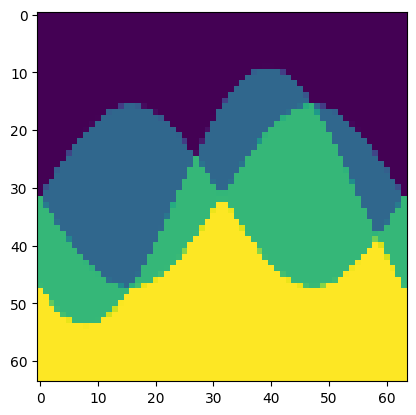

In [2]:
# All imports 
import torch 
from dect.directions import generate_2d_directions 
from dect.ect import compute_ect
from dect.ect_fn import scaled_sigmoid 

# Added for visualization.
import matplotlib.pyplot as plt

# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])

# Generate a set of structured directions along the unit circle.
v = generate_2d_directions(num_thetas=64)

# Compute the ECT.
ect = compute_ect(
    points_coordinates, 
    v=v,
    radius=1,
    resolution=64,
    scale=500,
    ect_fn=scaled_sigmoid
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()


Now we wish to compute the ECT of a dataset given this set of directions. 
We initialize the `ECTLayer` with configurations and compute the ECT. 

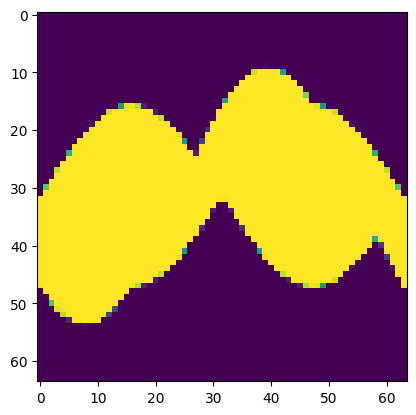

In [3]:
# Now do the same thing for a graph

# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])
edge_index=torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)


# Compute the ECT.
ect = compute_ect(
    points_coordinates, 
    edge_index,
    v=v,
    radius=1,
    resolution=64,
    scale=500,
    ect_fn=scaled_sigmoid
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()


Alternatively, use the `compute_ect_edges` function to accomplish the same. This functions is optimized for speed, 
whereas the more generic `compute_ect` can handle arbitrary simplicial complexes.

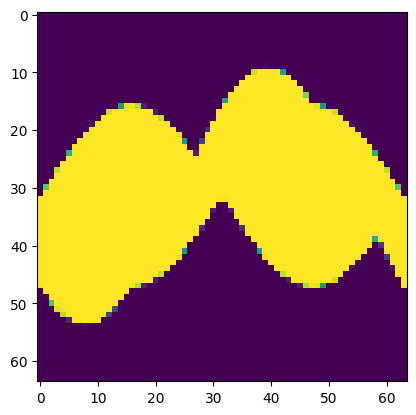

In [4]:
from dect.ect import compute_ect_edges


# Compute the ECT.
ect = compute_ect_edges(
    points_coordinates, 
    edge_index,
    v=v,
    radius=1,
    resolution=64,
    scale=500
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

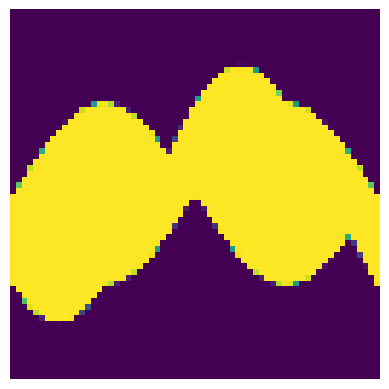

In [5]:
plt.imshow(ect.squeeze().cpu().detach().numpy().T)
plt.axis("off")

And for a mesh we have the same two options.

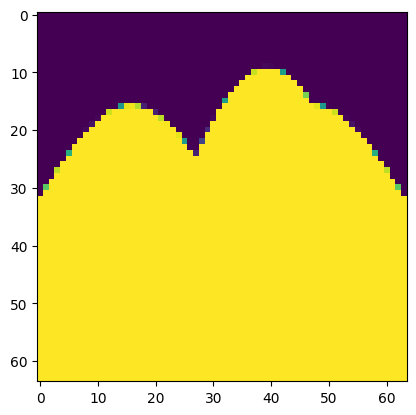

In [6]:
# Now do the same thing for a mesh
from dect.ect import compute_ect_mesh

# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])
edge_index=torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)
face_index=torch.tensor([[0], [1], [2]], dtype=torch.long)


# Compute the ECT.
ect = compute_ect_mesh(
    points_coordinates, 
    edge_index,
    face_index,
    v=v,
    radius=1,
    resolution=64,
    scale=500
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()


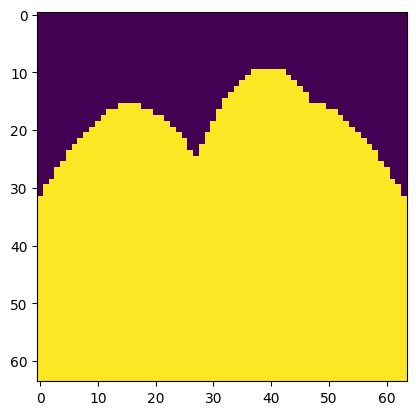

In [7]:
# Compute the ECT.
ect = compute_ect(
    points_coordinates, 
    edge_index,
    face_index,
    v=v,
    radius=1,
    resolution=64,
    scale=500
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()